In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from scipy.stats import norm
# from sklearn.preprocessing import StandardScaler
# from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv("./Ames_data.csv")
df_train.columns
df_train['Sale_Price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

/tmp/ipykernel_6937/3204114943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Sale_Price']);


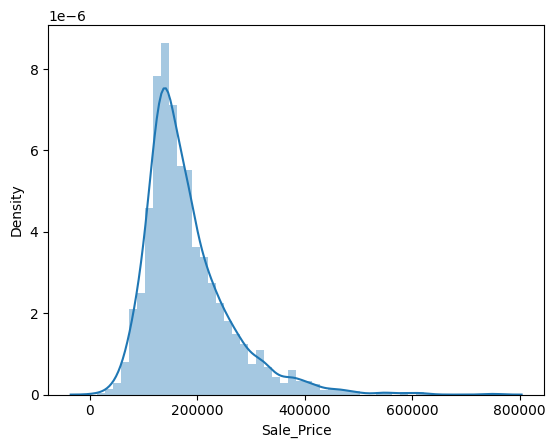

In [7]:
sns.distplot(df_train['Sale_Price']);

In [9]:
print("Skewness: %f" % df_train['Sale_Price'].skew())
print("Kurtosis: %f" % df_train['Sale_Price'].kurt())

Skewness: 1.743500
Kurtosis: 5.118900


## Altering Columns the Dataframe

In [27]:
categories = ["Very_Poor", "Poor", "Fair", "Below_Average", "Average", "Above_Average", "Good", "Very_Good", "Excellent", "Very_Excellent"]
values = [*range(1, 11)]

df_train["Overall_Qual"].replace(to_replace=categories, value=values, inplace=True)

print(df_train["Overall_Qual"])

0       6
1       5
2       6
3       7
4       5
       ..
2925    6
2926    5
2927    5
2928    5
2929    7
Name: Overall_Qual, Length: 2930, dtype: int64


# Finding Correlation/Patterns

## Heatmap

/tmp/ipykernel_6937/3846904610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


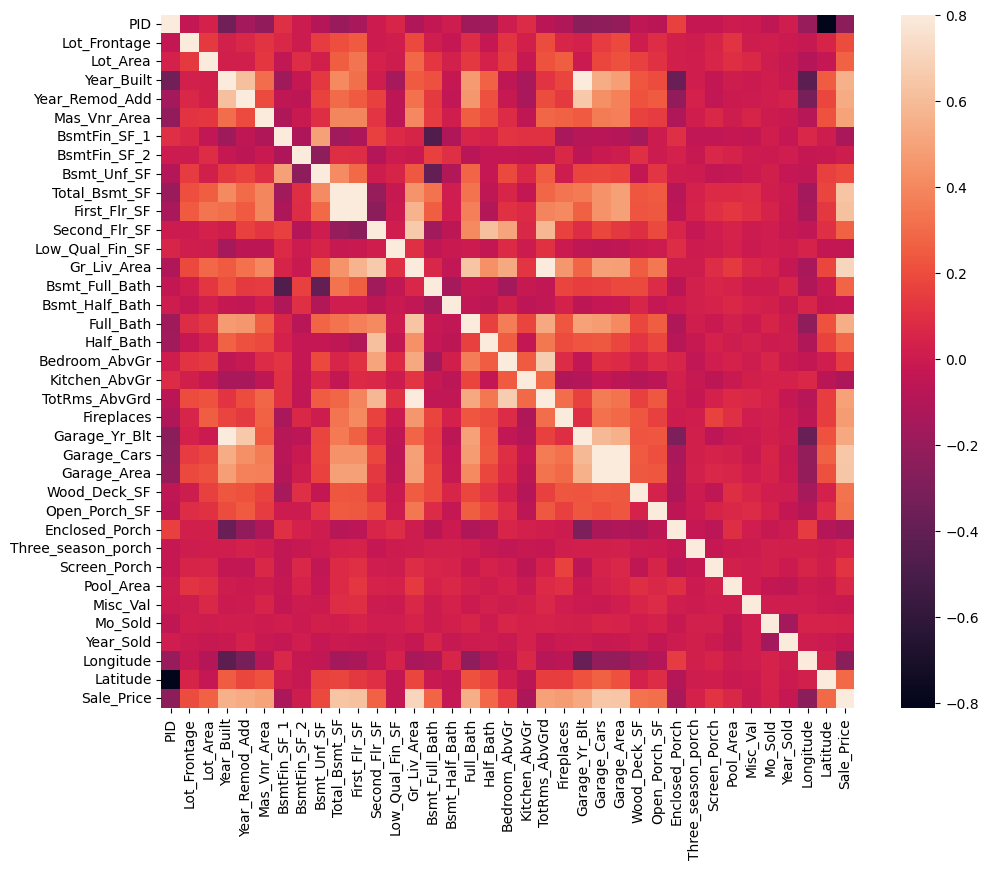

In [17]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Zoomed

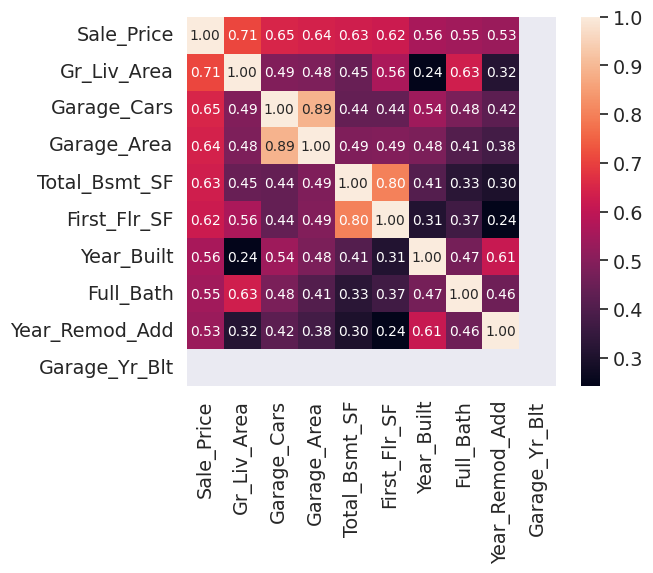

In [19]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Sale_Price')['Sale_Price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#scatterplot SEEMS BUGGY!
sns.set()
cols = ['Sale_Price', 'Overall_Qual', 'Gr_Liv_Area', 'Garage_Cars', 'Total_Bsmt_SF', 'Full_Bath', 'Year_Built']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

## Numerical

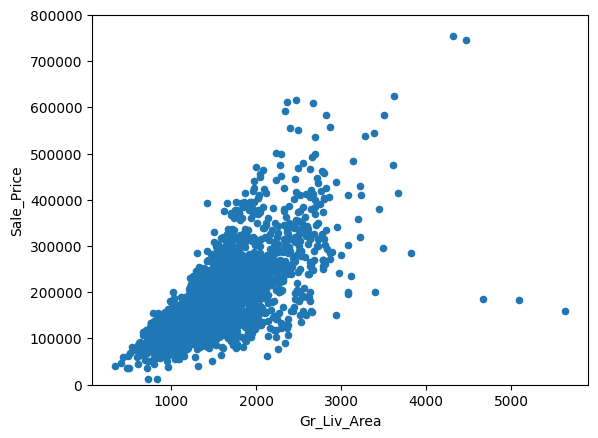

In [11]:
#scatter plot grlivarea/saleprice
var = 'Gr_Liv_Area'
data = pd.concat([df_train['Sale_Price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Sale_Price', ylim=(0,800000));

## Categorical

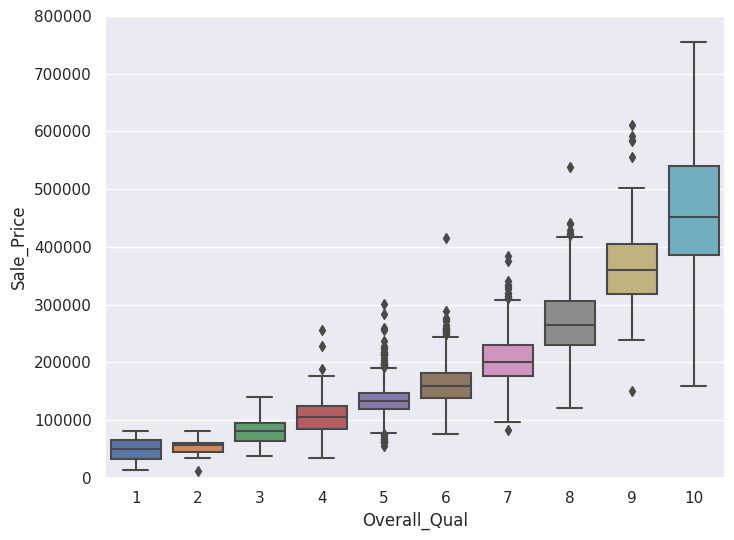

In [28]:
#box plot overallqual/saleprice
var = 'Overall_Qual'
data = pd.concat([df_train['Sale_Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Sale_Price", data=data)
fig.axis(ymin=0, ymax=800000);

# Missing Data

In [23]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Garage_Yr_Blt,159,0.054266
PID,0,0.000000
Garage_Area,0,0.000000
Garage_Finish,0,0.000000
Garage_Type,0,0.000000
